In [1]:
import pandas as pd
import xarray as xr
import pickle5 as pkl
import numpy as np
import geopy.distance as gpd
import matplotlib.pyplot as plt

In [2]:
with open('other_data/ws_wd_temp_2020.pkl', 'rb') as f:
    df = pkl.load(f)

In [3]:
ds = df.to_xarray()
ds['time_index'] = pd.to_datetime(ds['time_index'])

In [4]:
ds

<xarray.Dataset>
Dimensions:         (altitude: 14, lat: 3, lon: 3, time_index: 8784)
Coordinates:
  * time_index      (time_index) datetime64[ns] 2020-01-01 ... 2020-12-31T23:...
  * altitude        (altitude) int64 10 20 40 60 80 100 ... 180 200 220 240 260
  * lat             (lat) float64 39.35 39.55 39.75
  * lon             (lon) float64 -73.63 -73.43 -73.23
Data variables:
    wind_speed      (time_index, altitude, lat, lon) float32 8.4 8.25 ... 8.13
    wind_direction  (time_index, altitude, lat, lon) float32 237.4 ... 345.0
    temperature     (time_index, altitude, lat, lon) float32 8.86 8.82 ... 5.02

In [5]:
dTx1 = ds['temperature'].sel(lon = -73.43) - ds['temperature'].sel(lon=-73.63)
dTx2 = ds['temperature'].sel(lon = -73.23) - ds['temperature'].sel(lon=-73.43)
dTx = (dTx2 + dTx1) / 2

dTy1 = ds['temperature'].sel(lat = 39.75) - ds['temperature'].sel(lat = 39.55)
dTy2 = ds['temperature'].sel(lat = 39.55) - ds['temperature'].sel(lat = 39.35)
dTy = (dTy2 + dTy1) / 2

dx = gpd.geodesic((-73.23, 39.55), (-73.63, 39.55))/2
dy = gpd.geodesic((-73.43, 39.75), (-73.43, 39.35))/2

<xarray.DataArray 'temperature' ()>
array(-0.0135046, dtype=float32)
Coordinates:
    lat      float64 39.55 <xarray.DataArray 'temperature' ()>
array(0.01824519, dtype=float32)
Coordinates:
    lon      float64 -73.43 <xarray.DataArray 'temperature' ()>
array(9.72604, dtype=float32)


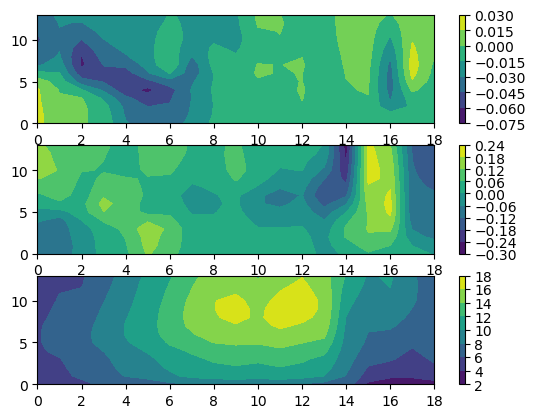

In [6]:
# April 5
t1 = '2020-04-05T17:00:00'
t2 = '2020-04-06T11:00:00'
dTdx = dTx.sel(lat=39.55, time_index=slice(t1, t2))/dx.km
dTdy = dTy.sel(lon=-73.43, time_index=slice(t1, t2))/dy.km
print(dTdx.mean(), dTdy.mean(), ds['temperature'].sel(time_index=slice(t1, t2)).mean())

fix, ax = plt.subplots(nrows=3)
c = ax[0].contourf(dTdx.T)
c2 = ax[1].contourf(dTdy.T)
c3 = ax[2].contourf(ds['wind_speed'].sel(time_index=slice(t1, t2), lat=39.55, lon=-73.43).T)
plt.colorbar(c, ax=ax[0])
plt.colorbar(c2, ax=ax[1])
plt.colorbar(c3, ax=ax[2])

# -0.0135046, 0.01824519, 9.72604

<xarray.DataArray 'temperature' ()>
array(-0.02310839, dtype=float32)
Coordinates:
    lat      float64 39.55 <xarray.DataArray 'temperature' ()>
array(0.09114332, dtype=float32)
Coordinates:
    lon      float64 -73.43 <xarray.DataArray 'temperature' ()>
array(18.259562, dtype=float32)


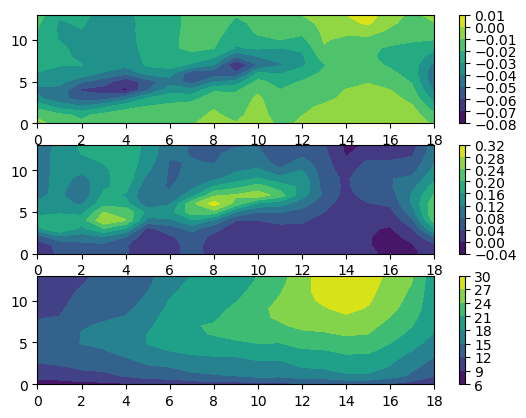

In [7]:
# May 15
t1 = '2020-05-15T15:00:00'
t2 = '2020-05-16T9:00:00'
dTdx = dTx.sel(lat=39.55, time_index=slice(t1, t2))/dx.km
dTdy = dTy.sel(lon=-73.43, time_index=slice(t1, t2))/dy.km
print(dTdx.mean(), dTdy.mean(), ds['temperature'].sel(time_index=slice(t1, t2)).mean())

fix, ax = plt.subplots(nrows=3)
c = ax[0].contourf(dTdx.T)
c2 = ax[1].contourf(dTdy.T)
c3 = ax[2].contourf(ds['wind_speed'].sel(time_index=slice(t1, t2), lat=39.55, lon=-73.43).T)
plt.colorbar(c, ax=ax[0])
plt.colorbar(c2, ax=ax[1])
plt.colorbar(c3, ax=ax[2])

# -0.02310839, 0.09114332, 18.259562

<xarray.DataArray 'temperature' ()>
array(-0.01457793, dtype=float32)
Coordinates:
    lat      float64 39.55 <xarray.DataArray 'temperature' ()>
array(-0.02821269, dtype=float32)
Coordinates:
    lon      float64 -73.43 <xarray.DataArray 'temperature' ()>
array(22.412947, dtype=float32)


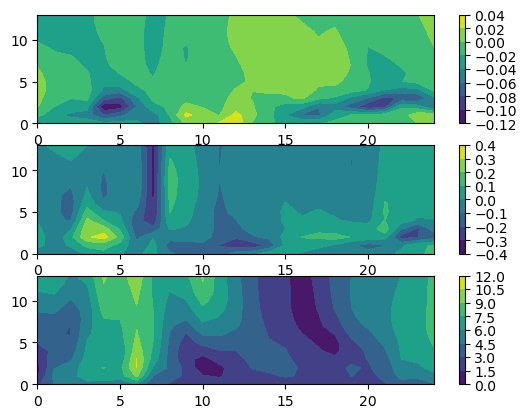

In [8]:
# June 3
t1 = '2020-06-03T21:00:00'
t2 = '2020-06-04T21:00:00'
dTdx = dTx.sel(lat=39.55, time_index=slice(t1, t2))/dx.km
dTdy = dTy.sel(lon=-73.43, time_index=slice(t1, t2))/dy.km
print(dTdx.mean(), dTdy.mean(), ds['temperature'].sel(time_index=slice(t1, t2)).mean())

fix, ax = plt.subplots(nrows=3)
c = ax[0].contourf(dTdx.T)
c2 = ax[1].contourf(dTdy.T)
c3 = ax[2].contourf(ds['wind_speed'].sel(time_index=slice(t1, t2), lat=39.55, lon=-73.43).T)
plt.colorbar(c, ax=ax[0])
plt.colorbar(c2, ax=ax[1])
plt.colorbar(c3, ax=ax[2])

# -0.02310839, 0.09114332, 18.259562